In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

## 1. White Daisies only

In [ ]:
# Assumptions
# All ground are fertile ground
# Only white daisies
# They cannot go extinct
# Cannot grow on top of each other

# Constants & Restrains
sigma = 5.67 * 10**(-8)
alpha_w = 0.75
alpha_g = 0.5
alpha_i = alpha_w
gamma = 0.3
R = 0.2
L = 0.4
S_o = 917
delta_t = 0.01

# Initial Conditions
initial_temperature = 303.15
# T_p = initial_temperature

# T_i = initial_temperature
area_w = 0.01
area_g = 0.99
ans = []
alpha_p = alpha_g * area_g + alpha_w * area_w

T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
T_i = (R * L * S_o / sigma * (alpha_p - alpha_i) + (T_p)**4)**0.25

ans.append([area_w, T_i, T_p])

for i in range (1000):



    beta_i = 1 - (0.003265 * (22.5+273.15-T_i))**2 # General_Daisy_Growth
    #if beta_i < 0:
    #    beta_i = 0

    delta_area_w = area_w * (area_g * beta_i - gamma) * delta_t
    area_w += delta_area_w
    #if area_w < 1e-9:
    #    area_w = 1e-9

    area_g = 1 - area_w
    alpha_p = alpha_g * area_g + alpha_w * area_w


    Old_T_p = T_p
    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
    T_i = (R * L * S_o / sigma * (alpha_p - alpha_i) + (T_p)**4)**0.25 # Daisy_Local_Temperature

    ans.append([area_w, T_i, T_p])

    if abs(delta_area_w) < 1e-7:
        break

    # delta_T_p = T_p - Old_T_p
    # if delta_T_p < 0.05:
    #     break



In [ ]:
# ans

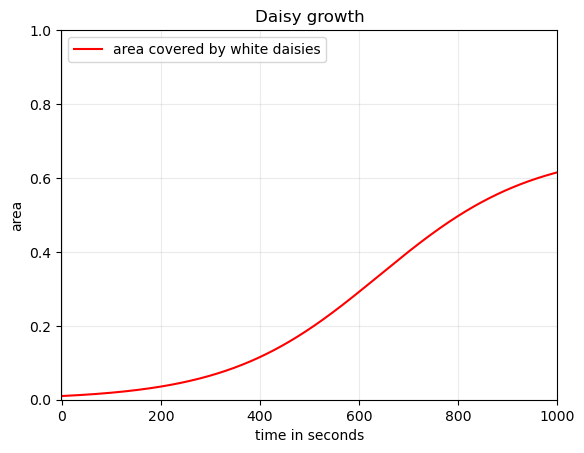

In [ ]:
y = [ans[i][0] for i in range (len(ans))]
x = [i for i in range (len(ans))]

plt.plot(x, y, color='red', label='area covered by white daisies')
plt.ylim(0, 1)
plt.xlim(-1, len(ans))
axs[0,0].xlabel('time in seconds')
axs[0,0].ylabel('area')
axs[0,0].title('Daisy growth')
axs[0,0].grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

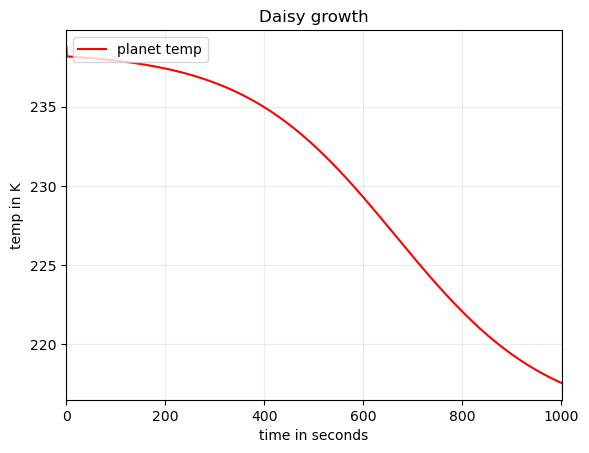

In [ ]:
y = [ans[i][2] for i in range (len(ans))]
x = [i for i in range (len(ans))]

plt.plot(x, y, color='red', label='planet temp')

plt.xlim(-1, len(ans))
plt.xlabel('time in seconds')
plt.ylabel('temp in K')
plt.title('Planet Temperature against time')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

## 2. White and Black Daisies

In [ ]:
# Euler
def w_and_b(w0, b0, L=1.0):
    # Constants & Restrains
    sigma = 5.67 * 10**(-8)
    alpha_w = 0.75
    alpha_b = 0.25
    alpha_g = 0.5
    gamma = 0.3
    R = 0.2
    S_o = 917
    delta_t = 0.1

    # Initial Conditions
    assert w0 + b0 <= 1, 'The total initial covered areas cannot be greater than 1'
    assert w0 > 0, 'The initial area covered by the white daisies cannot be 0 or less'
    assert b0 > 0, 'The initial area covered by the black daisies cannot be 0 or less'

    area_w = w0
    area_b = b0
    area_g = 1 - area_w - area_b
    ans2 = []
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b

    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25
    ans2.append([area_w, area_b, T_w, T_b, T_p])

    for i in range (1000000):

        # White growth
        beta_w = 1 - 0.003265 * (22.5+273.15-T_w)**2
        if beta_w < 0:
            beta_w = 0
        delta_area_w = area_w * (area_g * beta_w - gamma) * delta_t
        area_w += delta_area_w
        if area_w < 1e-9:
            area_w = 1e-9

        # Black growth
        beta_b = 1 - 0.003265 * (22.5+273.15-T_b)**2
        if beta_b < 0:
            beta_b = 0
        delta_area_b = area_b * (area_g * beta_b - gamma) * delta_t
        area_b += delta_area_b
        if area_b < 1e-9:
            area_b = 1e-9

        # Recalculating variables
        area_g = 1 - area_w - area_b
        alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
        Old_T_p = T_p
        T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
        T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
        T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

        # Storing answers
        ans2.append([area_w, area_b, T_w, T_b, T_p])

        # End condition
        if abs(delta_area_w) < 1e-11 and abs(delta_area_b) < 1e-11:
            break
        # if abs((T_p - Old_T_p) / Old_T_p) < 1e-7:
        #     break
    return ans2

In [ ]:
# Euler Cromer
def w_and_b(w0, b0, L=1.0):
    # Constants & Restrains
    sigma = 5.67 * 10**(-8)
    alpha_w = 0.75
    alpha_b = 0.25
    alpha_g = 0.5
    gamma = 0.3
    R = 0.2
    S_o = 917
    delta_t = 0.01

    # Initial Conditions
    assert w0 + b0 <= 1, 'The total initial covered areas cannot be greater than 1'
    assert w0 > 0, 'The initial area covered by the white daisies cannot be 0 or less'
    assert b0 > 0, 'The initial area covered by the black daisies cannot be 0 or less'

    area_w = w0
    area_b = b0
    area_g = 1 - area_w - area_b
    ans2 = []
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b

    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25
    ans2.append([area_w, area_b, T_w, T_b, T_p])

    for i in range (1000000):

        # White growth
        beta_w = 1 - 0.003265 * (22.5+273.15-T_w)**2
        if beta_w < 0:
            beta_w = 0
        delta_area_w = area_w * (area_g * beta_w - gamma) * delta_t
        area_w += delta_area_w
        if area_w < 1e-9:
            area_w = 1e-9

        # Recalculating variables
        area_g = 1 - area_w - area_b
        alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
        Old_T_p = T_p
        T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
        T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
        T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

        # Black growth
        beta_b = 1 - 0.003265 * (22.5+273.15-T_b)**2
        if beta_b < 0:
            beta_b = 0
        delta_area_b = area_b * (area_g * beta_b - gamma) * delta_t
        area_b += delta_area_b
        if area_b < 1e-9:
            area_b = 1e-9

        # Recalculating variables
        area_g = 1 - area_w - area_b
        alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
        Old_T_p = T_p
        T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
        T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
        T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

        # Storing answers
        ans2.append([area_w, area_b, T_w, T_b, T_p])

        # End condition
        if abs(delta_area_w) < 1e-7 and abs(delta_area_b) < 1e-7:
            break
    return ans2

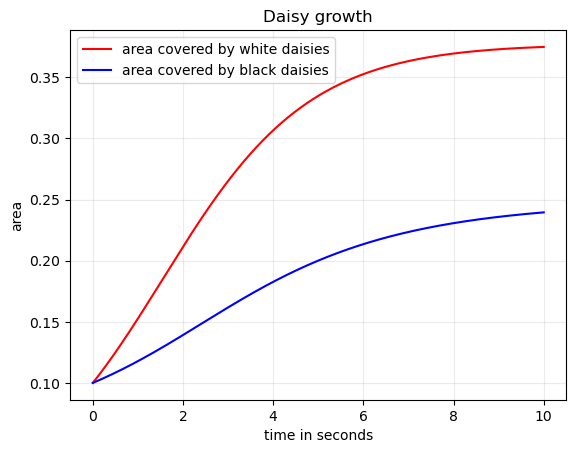

In [ ]:
lst = w_and_b(0.10,0.10,L=1.0)

w = [lst[i][0] for i in range (len(lst))]
b = [lst[i][1] for i in range (len(lst))]
x = [i/100 for i in range (len(lst))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('area')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

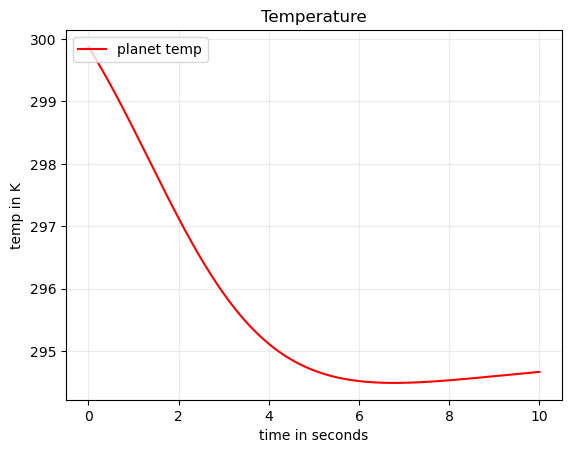

In [ ]:
lst = w_and_b(0.10,0.10,L=1.0)
y = [lst[i][4] for i in range (len(lst))]
x = [i/100 for i in range (len(lst))]

plt.plot(x, y, color='red', label='planet temp')

# plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('temp in K')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Assumptions
# All ground are fertile ground
# White and Black daisies
# They cannot go extinct
# Cannot grow on top of each other

# Constants & Restrains
sigma = 5.67 * 10**(-8)
alpha_w = 0.75
alpha_b = 0.25
alpha_g = 0.5
gamma = 0.3
R = 0.2
L = 1.0
S_o = 917
delta_t = 0.01

# Initial Conditions
area_w = 0.10
area_b = 0.10
area_g = 1 - area_w - area_b
ans2 = []
alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b

T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25
T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25
ans2.append([area_w, area_b, T_w, T_b, T_p])

for i in range (1000):

    beta_w = 1 - 0.003265 * (22.5+273.15-T_w)**2
    if beta_w < 0:
        beta_w = 0
    delta_area_w = area_w * (area_g * beta_w - gamma) * delta_t
    area_w += delta_area_w
    if area_w < 1e-9:
        area_w = 1e-9

    area_g = 1 - area_w - area_b
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
    Old_T_p = T_p
    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

    beta_b = 1 - 0.003265 * (22.5+273.15-T_b)**2
    if beta_b < 0:
        beta_b = 0
    delta_area_b = area_b * (area_g * beta_b - gamma) * delta_t
    area_b += delta_area_b
    if area_b < 1e-9:
        area_b = 1e-9

    area_g = 1 - area_w - area_b
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
    Old_T_p = T_p
    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

    ans2.append([area_w, area_b, T_w, T_b, T_p])

    if abs(delta_area_w) < 1e-7 and abs(delta_area_b) < 1e-7:
        break

    # delta_T_p = T_p - Old_T_p
    # if delta_T_p < 0.05:
    #     break



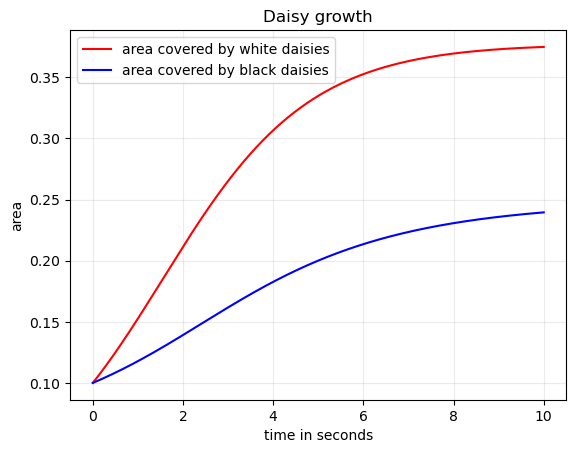

In [ ]:
w = [ans2[i][0] for i in range (len(ans2))]
b = [ans2[i][1] for i in range (len(ans2))]
x = [i/100 for i in range (len(ans2))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('area')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

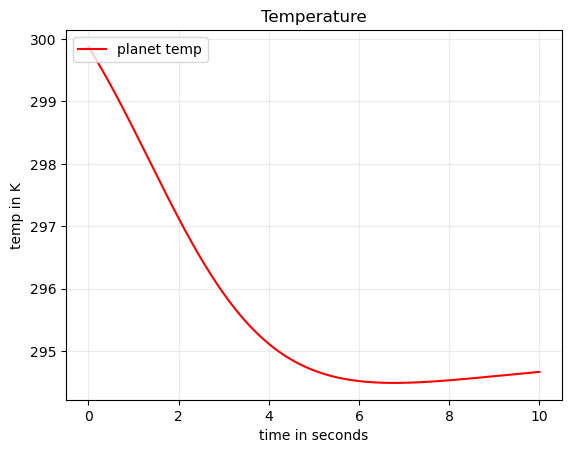

In [ ]:
y = [ans2[i][4] for i in range (len(ans2))]
x = [i/100 for i in range (len(ans2))]

plt.plot(x, y, color='red', label='planet temp')

# plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('temp in K')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

## 3. Varying Luminosity

In [ ]:
def vary_L(w0, b0, func, L_range):
    ans3 = []
    temp = func(w0, b0, L_range[0])[-1]
    ans3.append(temp)

    for i in L_range[1:]:
        temp = func(temp[0], temp[1], i)[-1]
        ans3.append(temp)

    return ans3

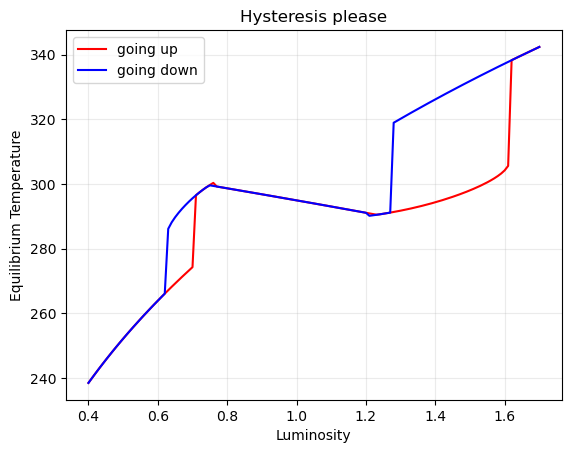

In [ ]:
L_up = np.linspace(0.4, 1.7, 131)
lst_up = vary_L(0.10,0.10,w_and_b,L_up)
L_down = np.linspace(1.7, 0.4, 131)
lst_down = vary_L(lst_up[-1][0],lst_up[-1][1],w_and_b,L_down)


t_up = [lst_up[i][-1] for i in range (len(lst_up))]
t_down = [lst_down[i][-1] for i in range (len(lst_down))]
x_up = [0.40+i*0.01 for i in range (len(lst_up))]
x_down = [1.70-i*0.01 for i in range (len(lst_down))]

plt.plot(x_up, t_up, color='red', label='going up')
plt.plot(x_down, t_down, color='blue', label='going down')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('Luminosity')
plt.ylabel('Equilibrium Temperature')
plt.title('Hysteresis please')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

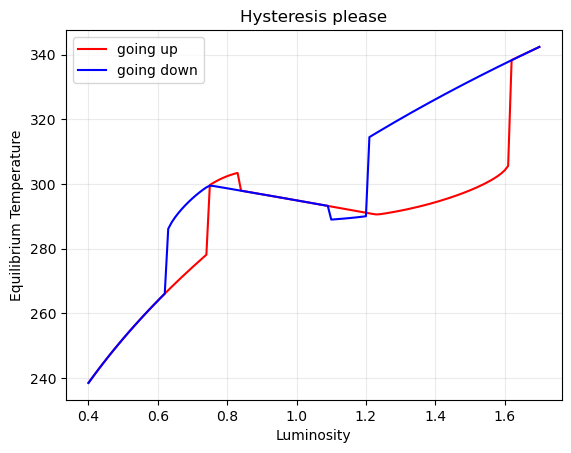

In [ ]:
L_up = np.linspace(0.4, 1.7, 131)
lst_up = vary_L(0.10,0.10,w_and_b,L_up)
L_down = np.linspace(1.7, 0.4, 131)
lst_down = vary_L(lst_up[-1][0],lst_up[-1][1],w_and_b,L_down)


t_up = [lst_up[i][-1] for i in range (len(lst_up))]
t_down = [lst_down[i][-1] for i in range (len(lst_down))]
x_up = [0.40+i*0.01 for i in range (len(lst_up))]
x_down = [1.70-i*0.01 for i in range (len(lst_down))]

plt.plot(x_up, t_up, color='red', label='going up')
plt.plot(x_down, t_down, color='blue', label='going down')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('Luminosity')
plt.ylabel('Equilibrium Temperature')
plt.title('Hysteresis please')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

## 4. Add ons

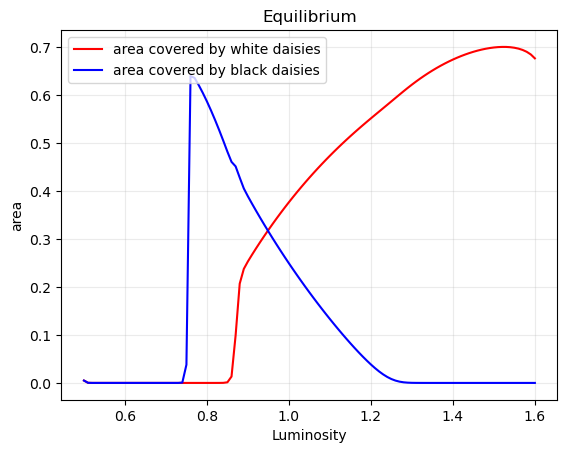

In [ ]:
L_up = np.linspace(0.5, 1.6, 111)
lst = vary_L(0.10,0.10,w_and_b,L_up)

w = [lst[i][0] for i in range (len(lst))]
b = [lst[i][1] for i in range (len(lst))]
x = [0.50+i*0.01 for i in range (len(lst))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('Luminosity')
plt.ylabel('area')
plt.title('Equilibrium')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

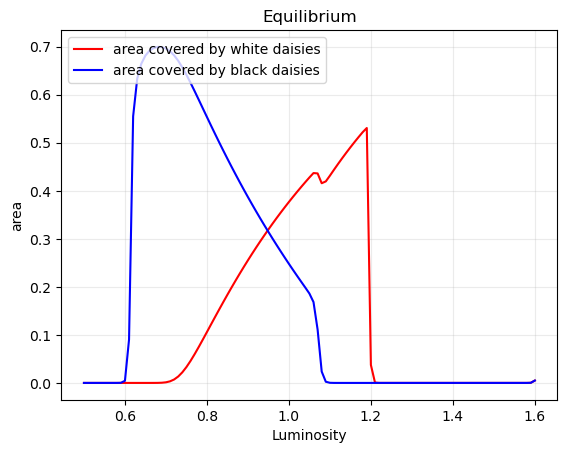

In [ ]:
L_down = np.linspace(1.6, 0.5, 111)
lst = vary_L(0.1,0.1,w_and_b,L_down)

w = [lst[i][0] for i in range (len(lst))]
b = [lst[i][1] for i in range (len(lst))]
x = [1.60-i*0.01 for i in range (len(lst))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('Luminosity')
plt.ylabel('area')
plt.title('Equilibrium')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

## 5. Extension (CO2)

In [ ]:
# Euler
def wb_co2(w0, b0, L=1.0):
    # Constants & Restrains
    sigma = 5.67 * 10**(-8)
    alpha_w = 0.75
    alpha_b = 0.25
    alpha_g = 0.5
    gamma = 0.3
    R = 0.2
    S_o = 917
    delta_t = 0.1


    # Initial Conditions
    assert w0 + b0 <= 1, 'The total initial covered areas cannot be greater than 1'
    assert w0 > 0, 'The initial area covered by the white daisies cannot be 0 or less'
    assert b0 > 0, 'The initial area covered by the black daisies cannot be 0 or less'

    area_w = w0
    area_b = b0
    area_g = 1 - area_w - area_b
    ans2 = []
    ans_CO2 = []
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b


    # CO2
    CO2 = 0.5 * area_g
    dCO2 = 0.5 * area_g  * delta_t
    CO2 += dCO2

    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25
    ans2.append([area_w, area_b, T_w, T_b, T_p])
    ans_CO2.append(CO2)

    for i in range (1000000):

        #CO2 = 0.5 * area_g
        dCO2 = 0.5 * (1-area_g)  * delta_t
        CO2 += dCO2

        # White growth
        beta_w = 1 - 0.003265 * (22.5+273.15-T_w)**2
        if beta_w < 0:
            beta_w = 0
        delta_area_w = area_w * (area_g * beta_w - gamma) * delta_t
        area_w += delta_area_w
        if area_w < 1e-9:
            area_w = 1e-9

        # Black growth
        beta_b = 1 - 0.003265 * (22.5+273.15-T_b)**2
        if beta_b < 0:
            beta_b = 0
        delta_area_b = area_b * (area_g * beta_b - gamma) * delta_t
        area_b += delta_area_b
        if area_b < 1e-9:
            area_b = 1e-9

        # Recalculating variables
        area_g = 1 - area_w - area_b
        alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
        Old_T_p = T_p
        T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
        T_CO2 = 0.2 * CO2
        T_p += T_CO2
        T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
        T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

        dCO2 = -(area_w + area_b) * 0.5 * delta_t
        CO2 += dCO2
        if CO2 < 0:
            CO2 = 0

        # Storing answers
        ans2.append([area_w, area_b, T_w, T_b, T_p])
        ans_CO2.append(CO2)

        # End condition
        if abs(delta_area_w) < 1e-11 and abs(delta_area_b) < 1e-11:
            break
        # if abs((T_p - Old_T_p) / Old_T_p) < 1e-7:
        #     break
    return (ans2, ans_CO2)

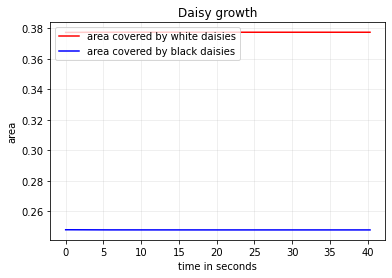

In [ ]:
# Daisies
lst = wb_co2(0.3772681005504521,0.247953542530792,L=1.0)[0]

w = [lst[i][0] for i in range (len(lst))]
b = [lst[i][1] for i in range (len(lst))]
x = [i/10 for i in range (len(lst))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('area')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

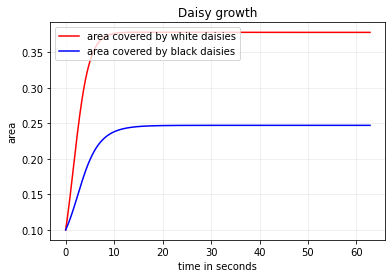

In [ ]:
# Daisies
lst = wb_co2(0.10,0.10,L=1.0)[0]

w = [lst[i][0] for i in range (len(lst))]
b = [lst[i][1] for i in range (len(lst))]
x = [i/10 for i in range (len(lst))]

plt.plot(x, w, color='red', label='area covered by white daisies')
plt.plot(x, b, color='blue', label='area covered by black daisies')
#plt.ylim(0, 1)
#plt.xlim(-1, len(ans2))
plt.xlabel('time in seconds')
plt.ylabel('area')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

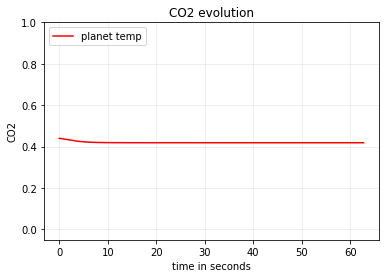

In [ ]:
# CO2
lst = wb_co2(0.10,0.10,L=1.0)[1]

y = [lst[i] for i in range (len(lst))]
x = [i/10 for i in range (len(lst))]

plt.plot(x, y, color='red', label='planet temp')

# plt.xlim(-1, len(ans2))
plt.ylim(-0.05, 1)
plt.xlabel('time in seconds')
plt.ylabel('CO2')
plt.title('CO2 evolution')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper left')
plt.show()

## 6. Extension 2: Ants!

In [ ]:
# Euler
def wb_co2_ants(w0, b0, L=1.0, a=0.05, d=0.01, c=0.01, p=0.5):
    # Constants & Restrains
    sigma = 5.67 * 10**(-8)
    alpha_w = 0.75
    alpha_b = 0.25
    alpha_g = 0.5
    gamma = 0.3
    R = 0.2
    S_o = 917
    delta_t = 0.1
    e = np.e
    #a = 25.0
    #d = 0.05

    # Initial Conditions
    assert w0 + b0 <= 1, 'The total initial covered areas cannot be greater than 1'
    assert w0 > 0, 'The initial area covered by the white daisies cannot be 0 or less'
    assert b0 > 0, 'The initial area covered by the black daisies cannot be 0 or less'

    area_w = w0
    area_b = b0
    area_g = 1 - area_w - area_b
    ans2 = []
    ans_CO2 = []
    ans_ants = []
    alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b


    # CO2
    CO2 = 0.5 * area_g
    #delta_CO2 = 0.5 * area_g  * delta_t
    #CO2 += delta_CO2

    # Ants
    ants = 10
    delta_ants = 0.1*delta_t #* e**(0.1*0)
    ants += delta_ants

    T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25
    T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25
    T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25
    ans2.append([area_w, area_b, T_w, T_b, T_p])
    ans_CO2.append(CO2)
    ans_ants.append(ants)

    for i in range (100000):#0
        # Ants
        #delta_ants = 0.1*delta_t * e**(0.1 * i * delta_t)
        delta_ants = ants * (a*(1-area_g)**2- d*(22.5+273.15-T_p)**2) * delta_t
        ants += delta_ants

        #no ants till later?
        if i*delta_t<0:
            ants=0
        # CO2
        #CO2 = 0.5 * area_g
        dCO2 = ants * c * delta_t
        CO2 += dCO2

        # White growth
        beta_w = max(0, 1 - 0.003265 * (22.5+273.15-T_w)**2)
        delta_area_w = area_w * (area_g * beta_w - gamma) * delta_t
        area_w = max(1e-9, area_w+delta_area_w)

        # Black growth
        beta_b = max(0, 1 - 0.003265 * (22.5+273.15-T_b)**2)
        delta_area_b = area_b * (area_g * beta_b - gamma) * delta_t
        area_b =max(1e-9, area_b+delta_area_b)

        # Recalculating variables
        area_g = 1 - area_w - area_b
        alpha_p = alpha_g * area_g + alpha_w * area_w + alpha_b * area_b
        Old_T_p = T_p
        T_p = (L * S_o / sigma * (1 - alpha_p)) ** 0.25 # Planet Temperature
        T_CO2 = 0.2 * CO2
        T_p += T_CO2

        T_w = (R * L * S_o / sigma * (alpha_p - alpha_w) + (T_p)**4)**0.25 # Daisy_Local_Temperature
        T_b = (R * L * S_o / sigma * (alpha_p - alpha_b) + (T_p)**4)**0.25 # Daisy_Local_Temperature

        dCO2 = -(area_w + area_b) * p * delta_t
        CO2 = max(0,CO2+dCO2)

        # Storing answers
        ans2.append([area_w, area_b, T_w, T_b, T_p])
        ans_CO2.append(CO2)
        ans_ants.append(ants)

        # End condition
        if abs(delta_area_w) < 1e-10 and abs(delta_area_b) < 1e-10:# and abs(delta_ants) < 1e-10:
            break
        # if abs((T_p - Old_T_p) / Old_T_p) < 1e-7:
        #     break
    return (ans2, ans_CO2, ans_ants)

### Modify `a` (Growth Rate)
#### *d=* 0.005(low), 0.03(high)
- Main list stores diff experiments, then we plot all at once

- From the graphs we can see a tipping point for when CO2 explodes, (white) daisies die and T keeps increasing.
- The T in the last plot centering around -0.7? isn't a mistake

*I haven't tested if all plots render correctly when done in the same cell

In [ ]:
li = []
lstx = []
#modifying growth rate
#[0.06,0.12,0.18]:
for i in [0.02,0.04,0.06,0.08,0.1]:
    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=i,c=0.08,d=0.005))
    #    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.07,c=A,d=0.015))
    lstx.append(i)

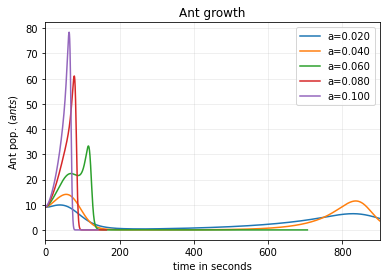

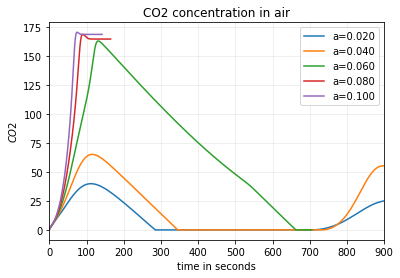

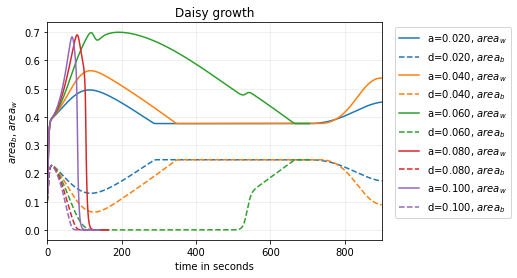

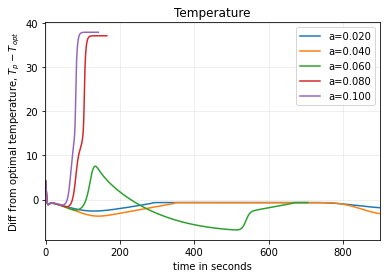

In [ ]:
for j in range(len(li)):
    lst = li[j][2]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 10)
plt.xlim(-1,900)
plt.xlabel('time in seconds')
plt.ylabel('Ant pop. ($ants$)')
plt.title('Ant growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][1]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(0, 900)
plt.xlabel('time in seconds')
plt.ylabel('$CO2$')
plt.title('CO2 concentration in air')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]

    w = [lst[i][0] for i in range (len(lst))]
    b = [lst[i][1] for i in range (len(lst))]
    wb = [lst[i][0]+lst[i][1] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    plt.plot(x, w, color=f'C{j}', label=f'a={lstx[j]:.3f}, $area_w$')
    plt.plot(x, b, color=f'C{j}', linestyle='dashed', label=f'd={lstx[j]:.3f}, $area_b$')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('$area_b$, $area_w$')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]
    w = [lst[i][2] for i in range (len(lst))]
    b = [lst[i][3] for i in range (len(lst))]
    p = [lst[i][4]-22.5-273.15 for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    #plt.plot(x, w, color=f'C{j}', label='Tw')
    #plt.plot(x, b, color=f'C{j}', label='Tb')
    plt.plot(x, p, color=f'C{j}', label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('Diff from optimal temperature, $T_p-T_{opt}$')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

### Extra Content

Interestingly, with a higher death rate (read: sensitivity) (0.03), high values of *a* didn't kill our ants and daisies rapidly, but oscillated at a low ant population AND high CO2 concentration. Hence, our extinction scenario occured due to the ants being too insensitive to temperature. There is a possiblity of hysteresis with changing *a*.

Ultimately, we did not include this more ideal oscillating state as it was harder to fit in with the rest of our data.

In [ ]:
li = []
lstx = []
#modifying growth rate
#[0.06,0.12,0.18]:
for i in [0.1,0.14,0.16,0.18,0.22]:
    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=i,c=0.08,d=0.03))
    #    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.07,c=A,d=0.015))
    lstx.append(i)

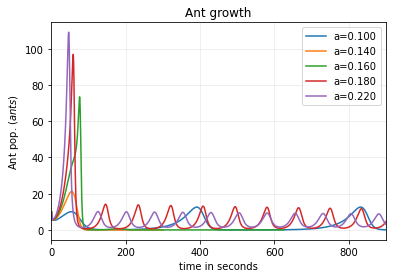

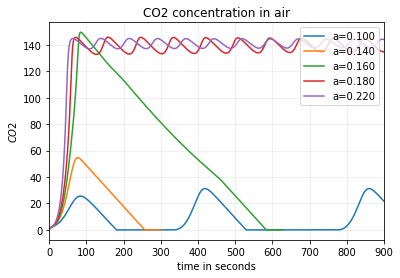

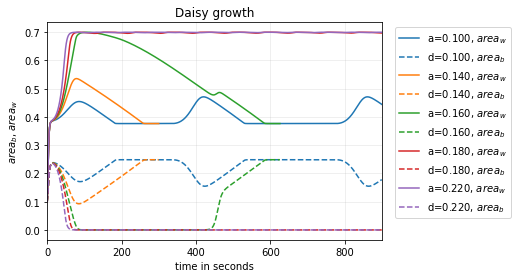

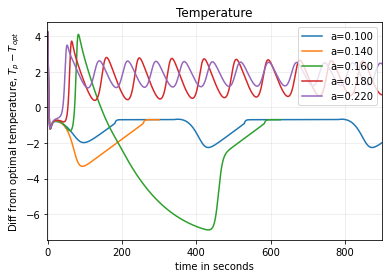

In [ ]:
for j in range(len(li)):
    lst = li[j][2]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 10)
plt.xlim(-1,900)
plt.xlabel('time in seconds')
plt.ylabel('Ant pop. ($ants$)')
plt.title('Ant growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][1]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(0, 900)
plt.xlabel('time in seconds')
plt.ylabel('$CO2$')
plt.title('CO2 concentration in air')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]

    w = [lst[i][0] for i in range (len(lst))]
    b = [lst[i][1] for i in range (len(lst))]
    wb = [lst[i][0]+lst[i][1] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    plt.plot(x, w, color=f'C{j}', label=f'a={lstx[j]:.3f}, $area_w$')
    plt.plot(x, b, color=f'C{j}', linestyle='dashed', label=f'd={lstx[j]:.3f}, $area_b$')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('$area_b$, $area_w$')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]
    w = [lst[i][2] for i in range (len(lst))]
    b = [lst[i][3] for i in range (len(lst))]
    p = [lst[i][4]-22.5-273.15 for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    #plt.plot(x, w, color=f'C{j}', label='Tw')
    #plt.plot(x, b, color=f'C{j}', label='Tb')
    plt.plot(x, p, color=f'C{j}', label=f'a={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('Diff from optimal temperature, $T_p-T_{opt}$')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

### Extension: Death Rate
#### *a=* 0.06 (low), 0.18 (high)
- d=0.002 - 0.005: ants die due to heat
- d=0.006 - 0.008: ants die due to cold
- d=0.009 and above: ants survive, the higher the d the shorter the period

In [ ]:
li = []
lstx = []
#modifying growth rate
#[0.06,0.12,0.18]:

for i in [0.002,0.005,0.007,0.01,0.02,0.03]:
    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.06,c=0.08,d=i))
    #    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.07,c=A,d=0.015))
    lstx.append(i)


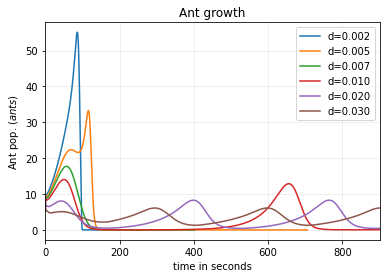

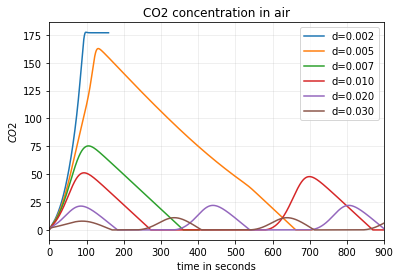

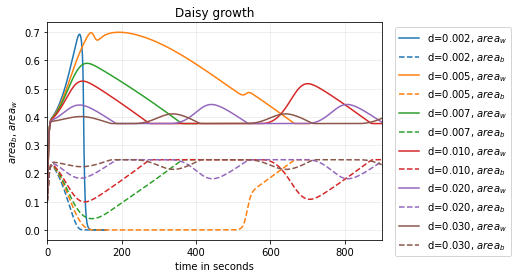

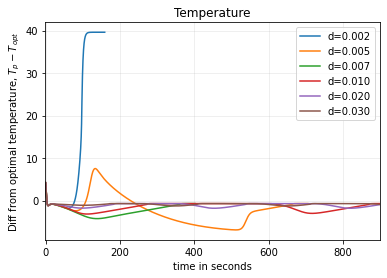

In [ ]:
for j in range(len(li)):
    lst = li[j][2]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 10)
plt.xlim(-1,900)
plt.xlabel('time in seconds')
plt.ylabel('Ant pop. ($ants$)')
plt.title('Ant growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][1]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(0, 900)
plt.xlabel('time in seconds')
plt.ylabel('$CO2$')
plt.title('CO2 concentration in air')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]

    w = [lst[i][0] for i in range (len(lst))]
    b = [lst[i][1] for i in range (len(lst))]
    wb = [lst[i][0]+lst[i][1] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    plt.plot(x, w, color=f'C{j}', label=f'd={lstx[j]:.3f}, $area_w$')
    plt.plot(x, b, color=f'C{j}', linestyle='dashed', label=f'd={lstx[j]:.3f}, $area_b$')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('$area_b$, $area_w$')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]
    w = [lst[i][2] for i in range (len(lst))]
    b = [lst[i][3] for i in range (len(lst))]
    p = [lst[i][4]-22.5-273.15 for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    #plt.plot(x, w, color=f'C{j}', label='Tw')
    #plt.plot(x, b, color=f'C{j}', label='Tb')
    plt.plot(x, p, color=f'C{j}', label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('Diff from optimal temperature, $T_p-T_{opt}$')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

Again, I test the value of a that gives us oscillation with high CO2.

In [ ]:
li = []
lstx = []
#modifying growth rate
#[0.06,0.12,0.18]:
for i in [0.005,0.007,0.01,0.02,0.03]:
    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.18,c=0.08,d=i))
    #    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.07,c=A,d=0.015))
    lstx.append(i)

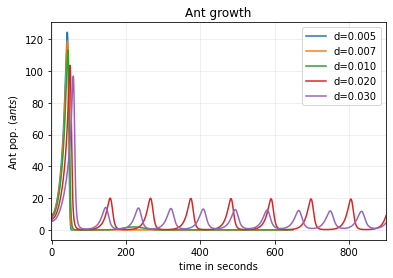

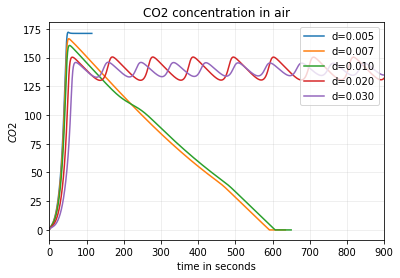

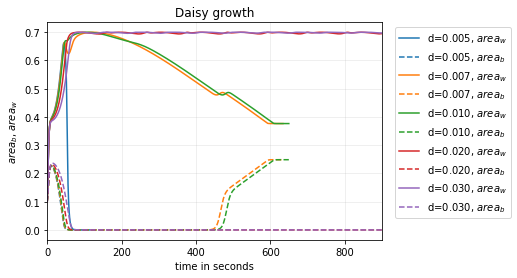

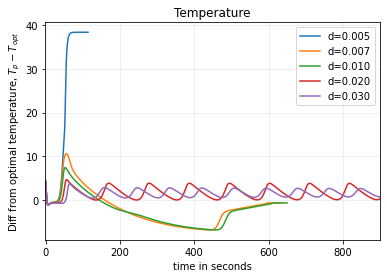

In [ ]:
for j in range(len(li)):
    lst = li[j][2]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 10)
plt.xlim(-1,900)
plt.xlabel('time in seconds')
plt.ylabel('Ant pop. ($ants$)')
plt.title('Ant growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][1]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(0, 900)
plt.xlabel('time in seconds')
plt.ylabel('$CO2$')
plt.title('CO2 concentration in air')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]

    w = [lst[i][0] for i in range (len(lst))]
    b = [lst[i][1] for i in range (len(lst))]
    wb = [lst[i][0]+lst[i][1] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    plt.plot(x, w, color=f'C{j}', label=f'd={lstx[j]:.3f}, $area_w$')
    plt.plot(x, b, color=f'C{j}', linestyle='dashed', label=f'd={lstx[j]:.3f}, $area_b$')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('$area_b$, $area_w$')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]
    w = [lst[i][2] for i in range (len(lst))]
    b = [lst[i][3] for i in range (len(lst))]
    p = [lst[i][4]-22.5-273.15 for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    #plt.plot(x, w, color=f'C{j}', label='Tw')
    #plt.plot(x, b, color=f'C{j}', label='Tb')
    plt.plot(x, p, color=f'C{j}', label=f'd={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('Diff from optimal temperature, $T_p-T_{opt}$')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

### Extension: CO2 rate - Varying e (c)

The graphs here vary slightly from our presentation (eg. initial path of ants from 10), but otherwise we have similar patterns.
- I used 0.01 cause 0.001 is off scale
- Note there is more similarity for the other graphs with diff c values.
- I'm not sure how my code is diff, 0.15 survives in this scenario. A higher value like 0.3 doesn't.

In [ ]:
li = []
lstx = []
#modifying growth rate
#[0.06,0.12,0.18]:
for i in [0.01,0.03,0.08,0.15,0.3]:
    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.06,c=i,d=0.03))
    #    li.append(wb_co2_ants(0.10,0.10,L=1.0,a=0.07,c=A,d=0.015))
    lstx.append(i)

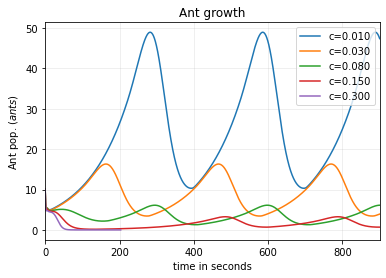

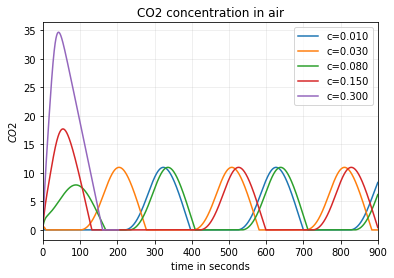

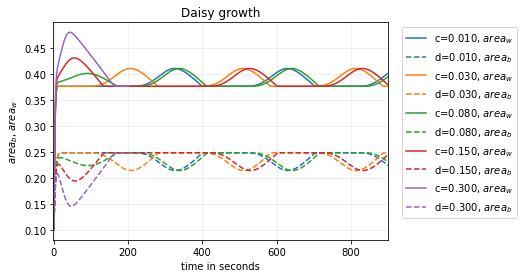

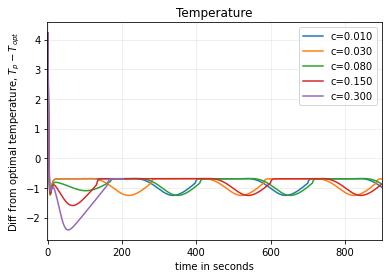

In [ ]:
for j in range(len(li)):
    lst = li[j][2]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'c={lstx[j]:.3f}')
#plt.ylim(0, 10)
plt.xlim(-1,900)
plt.xlabel('time in seconds')
plt.ylabel('Ant pop. ($ants$)')
plt.title('Ant growth')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][1]
    y = [lst[i] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]

    plt.plot(x, y, label=f'c={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(0, 900)
plt.xlabel('time in seconds')
plt.ylabel('$CO2$')
plt.title('CO2 concentration in air')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]

    w = [lst[i][0] for i in range (len(lst))]
    b = [lst[i][1] for i in range (len(lst))]
    wb = [lst[i][0]+lst[i][1] for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    plt.plot(x, w, color=f'C{j}', label=f'c={lstx[j]:.3f}, $area_w$')
    plt.plot(x, b, color=f'C{j}', linestyle='dashed', label=f'd={lstx[j]:.3f}, $area_b$')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('$area_b$, $area_w$')
plt.title('Daisy growth')
plt.grid(alpha = 0.25)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc = 'upper right')
plt.show()

for j in range(len(li)):
    lst = li[j][0]
    w = [lst[i][2] for i in range (len(lst))]
    b = [lst[i][3] for i in range (len(lst))]
    p = [lst[i][4]-22.5-273.15 for i in range (len(lst))]
    x = [i/10 for i in range (len(lst))]
    #plt.plot(x, w, color=f'C{j}', label='Tw')
    #plt.plot(x, b, color=f'C{j}', label='Tb')
    plt.plot(x, p, color=f'C{j}', label=f'c={lstx[j]:.3f}')
#plt.ylim(0, 2500)
plt.xlim(-1, 900)
plt.xlabel('time in seconds')
plt.ylabel('Diff from optimal temperature, $T_p-T_{opt}$')
plt.title('Temperature')
plt.grid(alpha = 0.25)
plt.legend(loc = 'upper right')
plt.show()